In [ ]:
#Scaling test

In [ ]:
#In this file it is tested wheter the transmission is scale invarriant
#Also the transmission for the different arrays is compared

In [ ]:
#First for the flat foile

In [60]:
def plane_scene(foil_width,foil_thickness = 75, samples = 10**7, alpha = 2):
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials
    perfect_reflector = mat_materials.perfect_mirror()

    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(0, d_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    #foil_material = schott("N-BK7") 
    foil_material = mat_materials.constant_n_glass(1.5)
    
    
    foil = Box(Point3D(-foil_width/2,-foil_thickness,-foil_width/2),Point3D(foil_width/2,0,foil_width/2),
               parent=world,material=foil_material)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness-1, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness-1, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness-1, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness-1, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    
    #Now placing the observing plane instead of the camera
    
    
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [61]:
import numpy as np
width = np.arange(50,650,50)
plane_powers = []
plane_errors = []

plane_normalized_powers = []
plane_normalized_errors = []

for w in width:
    print('Foil width =',w)
    P, E = plane_scene(w,samples = 10**6)
    plane_powers.append(P)
    plane_errors.append(E)

    plane_normalized_powers.append(P/w**2)
    plane_normalized_errors.append(E/w**2)
print('done')

Foil width = 50
Foil width = 100
Foil width = 150
Foil width = 200
Foil width = 250
Foil width = 300
Foil width = 350
Foil width = 400
Foil width = 450
Foil width = 500
Foil width = 550
Foil width = 600
done


In [63]:
#Raw data
print('plane_powers',plane_powers)
print('plane_errors',plane_errors)
print('plane_normalized_powers', [round(i,3) for i in plane_normalized_powers])
print('plane_normalized_errors', [round(i,3) for i in plane_normalized_errors])

plane_powers [3431, 13723, 30022, 52085, 78780, 121256, 171728, 208141, 290855, 337976, 422636, 479852]
plane_errors [101, 404, 895, 1572, 2417, 3599, 4996, 6287, 8360, 10013, 12317, 14318]
plane_normalized_powers [1.372, 1.372, 1.334, 1.302, 1.26, 1.347, 1.402, 1.301, 1.436, 1.352, 1.397, 1.333]
plane_normalized_errors [0.04, 0.04, 0.04, 0.039, 0.039, 0.04, 0.041, 0.039, 0.041, 0.04, 0.041, 0.04]


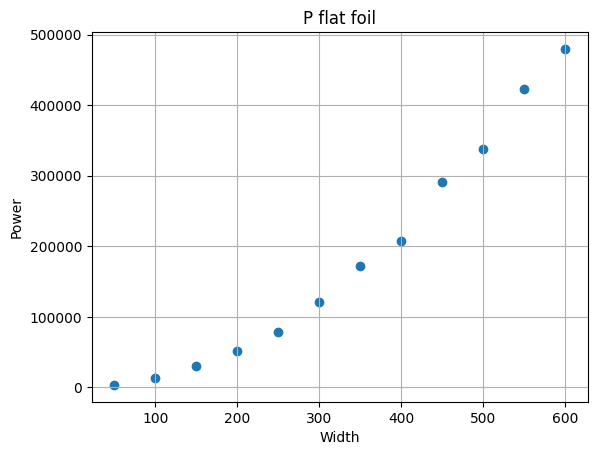

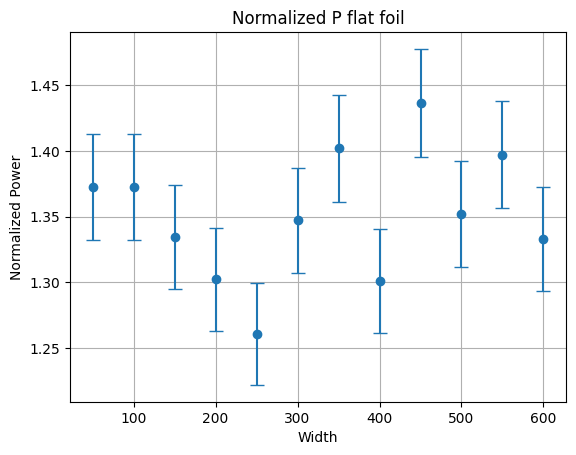

In [62]:
#Analyzing the data
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.title('P flat foil')
plt.xlabel('Width')
plt.ylabel('Power')
plt.scatter(width,plane_powers)
plt.show()


plt.figure(3)
plt.grid()
plt.title('Normalized P flat foil')
plt.xlabel('Width')
plt.ylabel('Normalized Power')
# Plot the data with error bars
plt.errorbar(width, plane_normalized_powers, yerr=plane_normalized_errors, fmt='o', capsize=5)
# Display the plot
plt.show()

In [ ]:
#For the pyramids


In [11]:
def pyramid_scene(foil_width,foil_thickness = 75, samples = 10**7, alpha = 2, theta = 25):
    #Here theta is the angle from the paper
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials, Microarrays
    perfect_reflector = mat_materials.perfect_mirror()

    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(0, d_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    #foil_material = schott("N-BK7") 
    foil_material = mat_materials.constant_n_glass(1.5)
    
    height = foil_width/2*tan(theta*np.pi/180)
    foil = Microarrays.pyramid_array(foil_width, height, foil_thickness, 1, foil_material,  world)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    
    #Now placing the observing plane instead of the camera
    
    
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [14]:
import numpy as np
width = np.arange(50,650,50)
pyramid_powers = []
pyramid_errors = []

pyramid_normalized_powers = []
pyramid_normalized_errors = []

for w in width:
    print('Foil width =',w)
    P, E = pyramid_scene(w, samples=10**6)
    pyramid_powers.append(P)
    pyramid_errors.append(E)

    pyramid_normalized_powers.append(P/w**2)
    pyramid_normalized_errors.append(E/w**2)

print('done')

Foil width = 50
Foil width = 100
Foil width = 150
Foil width = 200
Foil width = 250
Foil width = 300
Foil width = 350
Foil width = 400
Foil width = 450
Foil width = 500
Foil width = 550
Foil width = 600
done


In [22]:
#Raw data
print('pyramid_powers',plane_powers)
print('pyramid_errors',plane_errors)
print('pyramid_normalized_powers', [round(i,3) for i in plane_normalized_powers])
print('pyramid_normalized_errors', [round(i,3) for i in plane_normalized_errors])

pyramid_powers [3173, 13902, 29993, 51608, 81376, 122966, 159213, 208719, 280032, 338870, 389909, 471739]
pyramid_errors [97, 406, 895, 1565, 2457, 3624, 4811, 6295, 8203, 10026, 11831, 14196]
pyramid_normalized_powers [1.269, 1.39, 1.333, 1.29, 1.302, 1.366, 1.3, 1.304, 1.383, 1.355, 1.289, 1.31]
pyramid_normalized_errors [0.039, 0.041, 0.04, 0.039, 0.039, 0.04, 0.039, 0.039, 0.041, 0.04, 0.039, 0.039]


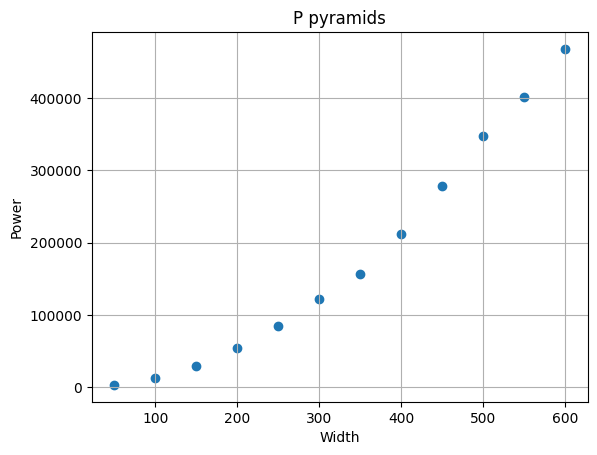

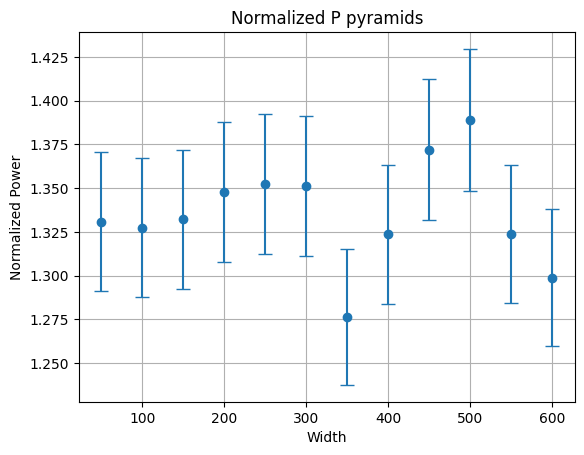

In [15]:
#Analyzing the data
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.title('P pyramids')
plt.xlabel('Width')
plt.ylabel('Power')
plt.scatter(width,pyramid_powers)
plt.show()


plt.figure(3)
plt.grid()
plt.title('Normalized P pyramids')
plt.xlabel('Width')
plt.ylabel('Normalized Power')
# Plot the data with error bars
plt.errorbar(width, pyramid_normalized_powers, yerr=pyramid_normalized_errors, fmt='o', capsize=5)
# Display the plot
plt.show()

In [ ]:
#Prisms

In [23]:
def prism_scene(foil_width,foil_thickness = 75, samples = 10**7, alpha = 2, theta = 25,r_source = 6.9634*10**8):
    #Here theta is the angle from the paper
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials, Microarrays
    perfect_reflector = mat_materials.perfect_mirror()

    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    #print('r_source',r_source)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(0, d_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    #foil_material = schott("N-BK7") 
    foil_material = mat_materials.constant_n_glass(1.5)
    
    height = foil_width/2*tan(theta*np.pi/180)
    foil = Microarrays.prism_array(foil_width, height, foil_thickness, 1, foil_material,  world)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    
    #Now placing the observing plane instead of the camera
    
    
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [24]:
#Gattering the data
import numpy as np
width = np.arange(50,650,50)
prism_powers = []
prism_errors = []

prism_normalized_powers = []
prism_normalized_errors = []

for w in width:
    print('Foil width =',w)
    P, E = prism_scene(w, samples=10**6)
    prism_powers.append(P)
    prism_errors.append(E)

    prism_normalized_powers.append(P/w**2)
    prism_normalized_errors.append(E/w**2)

print('done')

Foil width = 50
Foil width = 100
Foil width = 150
Foil width = 200
Foil width = 250
Foil width = 300
Foil width = 350
Foil width = 400
Foil width = 450
Foil width = 500
Foil width = 550
Foil width = 600
done


In [25]:
#Raw data
print('prism_powers',plane_powers)
print('prism_errors',plane_errors)
print('prism_normalized_powers', [round(i,3) for i in plane_normalized_powers])
print('prism_normalized_errors', [round(i,3) for i in plane_normalized_errors])

prism_powers [3173, 13902, 29993, 51608, 81376, 122966, 159213, 208719, 280032, 338870, 389909, 471739]
prism_errors [97, 406, 895, 1565, 2457, 3624, 4811, 6295, 8203, 10026, 11831, 14196]
prism_normalized_powers [1.269, 1.39, 1.333, 1.29, 1.302, 1.366, 1.3, 1.304, 1.383, 1.355, 1.289, 1.31]
prism_normalized_errors [0.039, 0.041, 0.04, 0.039, 0.039, 0.04, 0.039, 0.039, 0.041, 0.04, 0.039, 0.039]


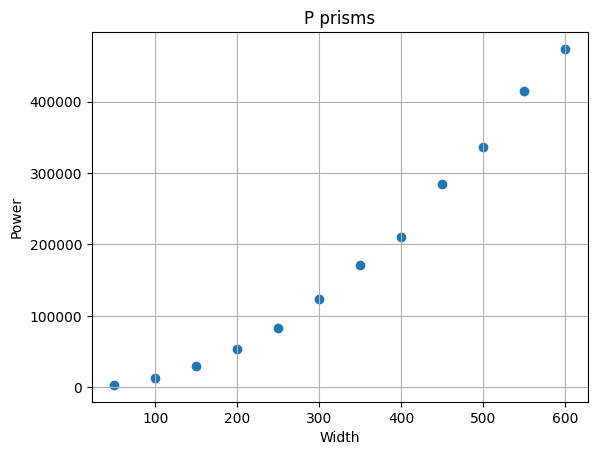

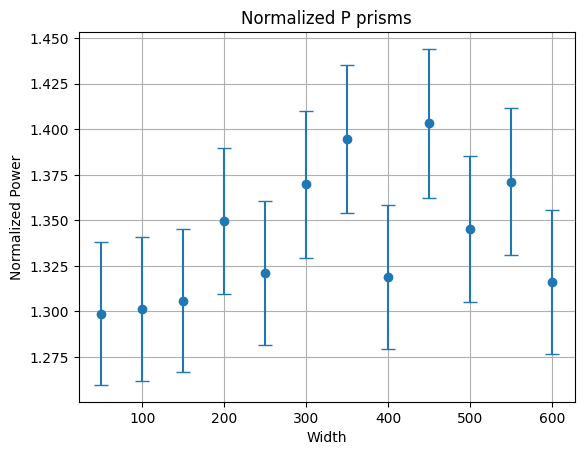

In [26]:
#Analyzing the data
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.title('P prisms')
plt.xlabel('Width')
plt.ylabel('Power')
plt.scatter(width,prism_powers)
plt.show()


plt.figure(3)
plt.grid()
plt.title('Normalized P prisms')
plt.xlabel('Width')
plt.ylabel('Normalized Power')
# Plot the data with error bars
plt.errorbar(width, prism_normalized_powers, yerr=prism_normalized_errors, fmt='o', capsize=5)
# Display the plot
plt.show()

In [ ]:
#Microdomes

In [27]:
def micro_dome_scene(foil_width,foil_thickness = 75, samples = 10**7, alpha = 2):
    #Here theta is the angle from the paper
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials, Microarrays
    perfect_reflector = mat_materials.perfect_mirror()

    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(0, d_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    #foil_material = schott("N-BK7") 
    foil_material = mat_materials.constant_n_glass(1.5)
    
    height = foil_width/400*65
    foil = Microarrays.micro_dome_array(foil_width, height, foil_thickness, 1, foil_material, world)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    
    #Now placing the observing plane instead of the camera
    
    
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [31]:
#Gattering the data
import numpy as np
width = np.arange(50,650,50)
micro_dome_powers = []
micro_dome_errors = []

micro_dome_normalized_powers = []
micro_dome_normalized_errors = []

for w in width:
    print('Foil width =',w)
    P, E = micro_dome_scene(w,samples=10**6)
    micro_dome_powers.append(P)
    micro_dome_errors.append(E)

    micro_dome_normalized_powers.append(P/w**2)
    micro_dome_normalized_errors.append(E/w**2)

print('done')

Foil width = 50
Foil width = 100
Foil width = 150
Foil width = 200
Foil width = 250
Foil width = 300
Foil width = 350
Foil width = 400
Foil width = 450
Foil width = 500
Foil width = 550
Foil width = 600
done


In [32]:
#Raw data
print('micro_dome_powers',plane_powers)
print('micro_dome_errors',plane_errors)
print('micro_dome_normalized_powers', [round(i,3) for i in plane_normalized_powers])
print('micro_dome_normalized_errors', [round(i,3) for i in plane_normalized_errors])

micro_dome_powers [3173, 13902, 29993, 51608, 81376, 122966, 159213, 208719, 280032, 338870, 389909, 471739]
micro_dome_errors [97, 406, 895, 1565, 2457, 3624, 4811, 6295, 8203, 10026, 11831, 14196]
micro_dome_normalized_powers [1.269, 1.39, 1.333, 1.29, 1.302, 1.366, 1.3, 1.304, 1.383, 1.355, 1.289, 1.31]
micro_dome_normalized_errors [0.039, 0.041, 0.04, 0.039, 0.039, 0.04, 0.039, 0.039, 0.041, 0.04, 0.039, 0.039]


In [ ]:
#Analyzing the data

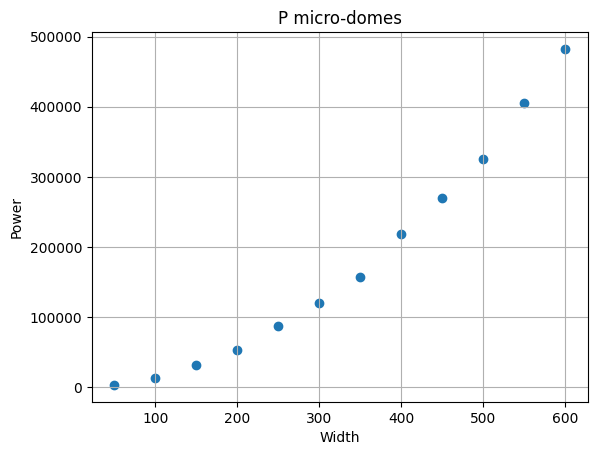

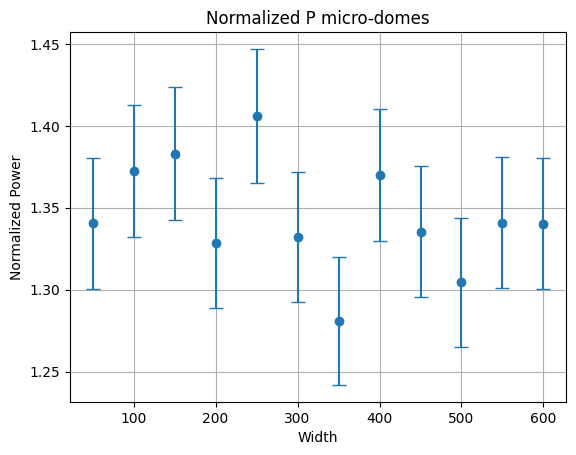

In [33]:
#Analyzing the data
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.title('P micro-domes')
plt.xlabel('Width')
plt.ylabel('Power')
plt.scatter(width,micro_dome_powers)
plt.show()


plt.figure(3)
plt.grid()
plt.title('Normalized P micro-domes')
plt.xlabel('Width')
plt.ylabel('Normalized Power')
# Plot the data with error bars
plt.errorbar(width, micro_dome_normalized_powers, yerr=micro_dome_normalized_errors, fmt='o', capsize=5)
# Display the plot
plt.show()

In [ ]:
#Cones

In [34]:
def cone_scene(foil_width,foil_thickness = 75, samples = 10**7, alpha = 2):
    #Here theta is the angle from the paper
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials, Microarrays
    perfect_reflector = mat_materials.perfect_mirror()

    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(0, d_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    #foil_material = schott("N-BK7") 
    foil_material = mat_materials.constant_n_glass(1.5)
    
    height = foil_width/250*115
    foil = Microarrays.cone_array(foil_width, height, foil_thickness, 1, foil_material, world)
    foil.transform = rotate_x(-90) * foil.transform #This line was initially missing, but is important
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    
    #Now placing the observing plane instead of the camera
    
    
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [35]:
#Gattering the data
import numpy as np
width = np.arange(50,650,50)
cone_powers = []
cone_errors = []

cone_normalized_powers = []
cone_normalized_errors = []

for w in width:
    print('Foil width =',w)
    P, E = cone_scene(w, samples=10**6)
    cone_powers.append(P)
    cone_errors.append(E)

    cone_normalized_powers.append(P/w**2)
    cone_normalized_errors.append(E/w**2)

print('Done')

Foil width = 50
Foil width = 100
Foil width = 150
Foil width = 200
Foil width = 250
Foil width = 300
Foil width = 350
Foil width = 400
Foil width = 450
Foil width = 500
Foil width = 550
Foil width = 600
Done


In [36]:
#Raw data
print('cone_powers',plane_powers)
print('cone_errors',plane_errors)
print('cone_normalized_powers', [round(i,3) for i in plane_normalized_powers])
print('cone_normalized_errors', [round(i,3) for i in plane_normalized_errors])

cone_powers [3173, 13902, 29993, 51608, 81376, 122966, 159213, 208719, 280032, 338870, 389909, 471739]
cone_errors [97, 406, 895, 1565, 2457, 3624, 4811, 6295, 8203, 10026, 11831, 14196]
cone_normalized_powers [1.269, 1.39, 1.333, 1.29, 1.302, 1.366, 1.3, 1.304, 1.383, 1.355, 1.289, 1.31]
cone_normalized_errors [0.039, 0.041, 0.04, 0.039, 0.039, 0.04, 0.039, 0.039, 0.041, 0.04, 0.039, 0.039]


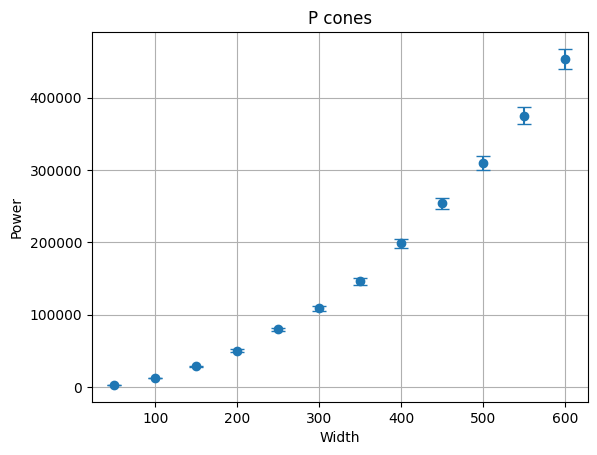

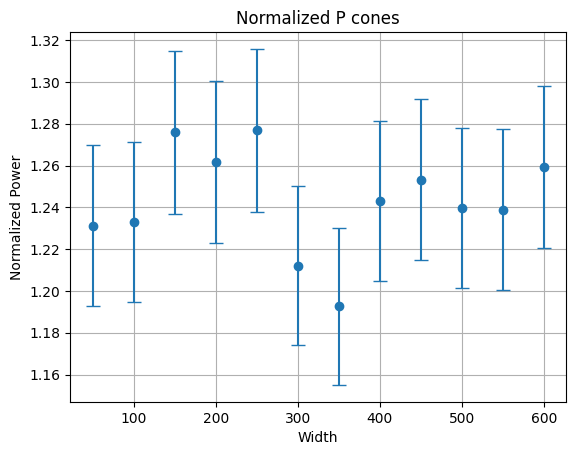

In [40]:
#Analyzing the data
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.title('P cones')
plt.xlabel('Width')
plt.ylabel('Power')
#plt.scatter(width,cone_powers)
plt.errorbar(width, cone_powers, yerr=cone_errors, fmt='o', capsize=5)
plt.show()


plt.figure(3)
plt.grid()
plt.title('Normalized P cones')
plt.xlabel('Width')
plt.ylabel('Normalized Power')
# Plot the data with error bars
plt.errorbar(width, cone_normalized_powers, yerr=cone_normalized_errors, fmt='o', capsize=5)
# Display the plot
plt.show()

In [ ]:
#Plotting all the data in one figure

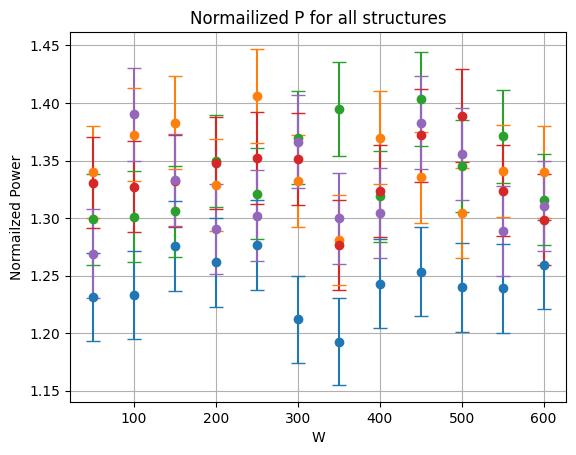

In [41]:
plt.figure()
plt.title('Normailized P for all structures')
plt.xlabel('W')
plt.ylabel('Normailzed Power')
plt.errorbar(width, cone_normalized_powers, yerr=cone_normalized_errors, fmt='o', capsize=5)
plt.errorbar(width, micro_dome_normalized_powers, yerr=micro_dome_normalized_errors, fmt='o', capsize=5)
plt.errorbar(width, prism_normalized_powers, yerr=prism_normalized_errors, fmt='o', capsize=5)
plt.errorbar(width, pyramid_normalized_powers, yerr=pyramid_normalized_errors, fmt='o', capsize=5)
plt.errorbar(width, plane_normalized_powers, yerr=plane_normalized_errors, fmt='o', capsize=5)
plt.grid()


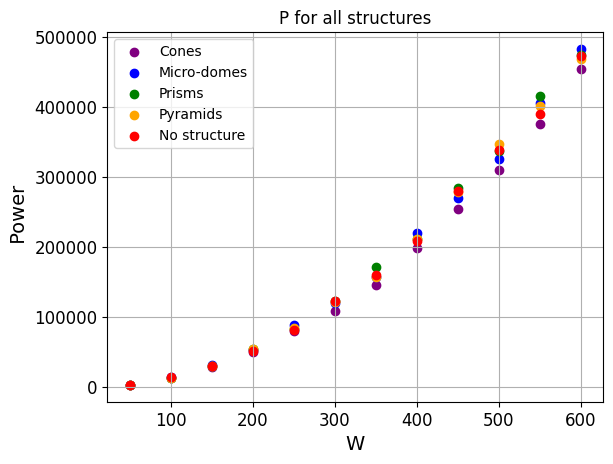

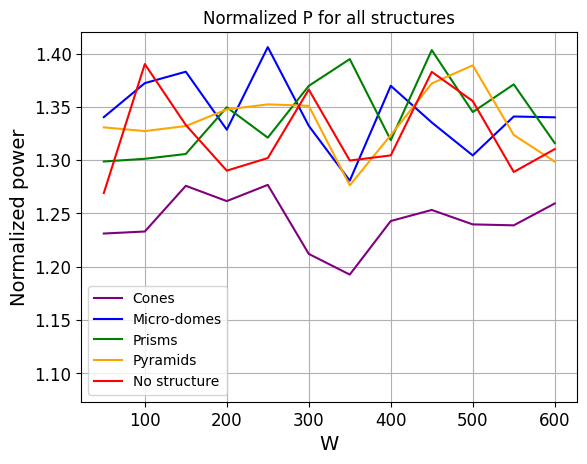

In [58]:
plt.figure(1)
plt.xticks(fontsize=12)  # Set the font size for the x-axis numbers
plt.yticks(fontsize=12)  # Set the font size for the y-axis numbers
plt.title('P for all structures')
plt.xlabel('W',fontsize = 14)
plt.ylabel(' Power',fontsize = 14)
plt.scatter(width, cone_powers, color = 'purple', label = 'Cones')
plt.scatter(width, micro_dome_powers, color = 'blue', label = 'Micro-domes' )
plt.scatter(width, prism_powers, color = 'green', label = 'Prisms')
plt.scatter(width, pyramid_powers, color = 'orange', label = 'Pyramids')
plt.scatter(width, plane_powers, color = 'red', label='No structure')
plt.legend()
plt.grid()

plt.figure(3)
plt.xticks(fontsize=12)  # Set the font size for the x-axis numbers
plt.yticks(fontsize=12)  # Set the font size for the y-axis numbers
plt.title('Normalized P for all structures')
plt.xlabel('W',fontsize = 14)
plt.ylabel('Normalized power',fontsize = 14)
plt.plot(width, cone_normalized_powers, color = 'purple', label = 'Cones')
plt.plot(width, micro_dome_normalized_powers, color = 'blue', label = 'Micro-domes' )
plt.plot(width, prism_normalized_powers, color = 'green', label = 'Prisms')
plt.plot(width, pyramid_normalized_powers, color = 'orange', label = 'Pyramids')
plt.plot(width, plane_normalized_powers, color = 'red', label='No structure')
plt.ylim(0.9*min(cone_normalized_powers+micro_dome_normalized_powers+
                prism_normalized_powers+pyramid_normalized_powers+
                plane_normalized_powers),1.01*max(cone_normalized_powers+
                                                 micro_dome_normalized_powers+
                prism_normalized_powers+pyramid_normalized_powers+
                plane_normalized_powers))
plt.legend()
plt.grid()